## Tensor ve Parameter

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BoostcampAITech/lecture-note-python-basics-for-ai/blob/main/codes/pytorch/07_torch-study/autograd_and_optimizer.ipynb)

In [1]:
import torch
from torch import nn
from torch import Tensor


In [2]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = nn.Parameter(
                torch.randn(in_features, out_features))
        
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [3]:
x = torch.randn(5, 7) # 데이터 5개, feature 7개

In [4]:
x

tensor([[-2.1837e-01, -1.0570e+00,  9.3776e-01,  7.1992e-01,  2.5761e+00,
          2.4830e-01, -1.6389e+00],
        [-1.2188e+00,  6.5659e-01,  1.6229e-01,  5.0418e-01,  8.2476e-04,
          4.8771e-01,  1.1425e+00],
        [-3.5830e-01,  6.1187e-01,  8.7164e-01, -9.5114e-01, -6.4006e-01,
          1.1342e+00,  9.7132e-02],
        [-7.5333e-01,  9.2617e-01,  4.7847e-01,  5.2383e-01,  1.3417e+00,
          6.1859e-01,  1.2160e+00],
        [ 2.2555e+00, -1.3954e-01,  5.4086e-01,  4.2143e-01, -3.4109e-01,
          5.0862e-02, -9.5772e-01]])

In [5]:
layer = MyLiner(7, 12) # feature 7개를 받아 feature 12개로 바꿀 것이다.
layer(x).shape # x를 넣어 5개의 데이터, 12개의 feature로 나온 것 확인

torch.Size([5, 12])

In [8]:
layer.weights
# 랜덤하게 정한 가중치값과 requires_grad=True, gradient 대상이 되는지 표현해놓음

Parameter containing:
tensor([[-1.1487, -0.5641, -0.3288, -0.4753,  0.0402,  1.0888,  0.3055, -0.4532,
         -0.9460, -0.5054, -1.7584,  0.6549],
        [ 1.1289, -1.9335,  0.2754, -0.2512, -1.2552, -1.9192, -0.4372,  0.1837,
         -1.5948, -1.3692, -0.1194, -0.3733],
        [ 0.8447, -1.9021, -0.7716,  0.8242,  0.7615, -0.0300, -0.8024,  1.3214,
          0.2682,  1.2798,  0.9819, -0.9377],
        [-0.3385,  1.3483, -0.2251,  1.4304,  0.3109,  1.6618, -0.6276,  1.8131,
         -0.0606, -0.0379, -0.4967,  0.6078],
        [ 0.0347, -0.9833,  1.1393,  0.1109, -1.6065, -1.2964,  0.1504,  0.7994,
          0.5368, -0.2162, -1.2240,  0.1354],
        [-0.2259,  0.1370,  0.6304, -0.9313, -2.0547,  1.4028,  0.1956,  1.0752,
         -0.9948,  0.2527, -0.3489,  0.0979],
        [-0.6270, -1.1007, -0.4789,  1.4768,  0.0021,  0.7097,  1.0431, -0.4738,
         -2.0147,  0.7524,  1.1545, -0.5874]], requires_grad=True)

In [9]:
for value in layer.parameters(): # 학습이 되는 파라미터들의 가중치 값들 확인할 수 있다.
    print(value)
# 가중치와 편향값 포함

Parameter containing:
tensor([[-1.1487, -0.5641, -0.3288, -0.4753,  0.0402,  1.0888,  0.3055, -0.4532,
         -0.9460, -0.5054, -1.7584,  0.6549],
        [ 1.1289, -1.9335,  0.2754, -0.2512, -1.2552, -1.9192, -0.4372,  0.1837,
         -1.5948, -1.3692, -0.1194, -0.3733],
        [ 0.8447, -1.9021, -0.7716,  0.8242,  0.7615, -0.0300, -0.8024,  1.3214,
          0.2682,  1.2798,  0.9819, -0.9377],
        [-0.3385,  1.3483, -0.2251,  1.4304,  0.3109,  1.6618, -0.6276,  1.8131,
         -0.0606, -0.0379, -0.4967,  0.6078],
        [ 0.0347, -0.9833,  1.1393,  0.1109, -1.6065, -1.2964,  0.1504,  0.7994,
          0.5368, -0.2162, -1.2240,  0.1354],
        [-0.2259,  0.1370,  0.6304, -0.9313, -2.0547,  1.4028,  0.1956,  1.0752,
         -0.9948,  0.2527, -0.3489,  0.0979],
        [-0.6270, -1.1007, -0.4789,  1.4768,  0.0021,  0.7097,  1.0431, -0.4738,
         -2.0147,  0.7524,  1.1545, -0.5874]], requires_grad=True)
Parameter containing:
tensor([-0.8406,  1.1969, -0.9862, -1.0003, -0

In [10]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = Tensor( # nn.Parameter 대신 Tensor로 표현했을 때 방식은 거의 동일하다
                torch.randn(in_features, out_features))
        
        self.bias = Tensor(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias


layer = MyLiner(7, 12)
layer(x).shape

torch.Size([5, 12])

In [11]:
for value in layer.parameters(): # 하지만 parameters를 프린트해보라고 하면 안나온다!
    print(value)
# 미분의 대상이 되는 것만 가능하기 때문에, requires_grad=True가 자동으로 되지 않는 tensor의 경우 프린트가 되지 않는다.

## AutoGrad for Linear Regression
https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

$$ y=2x+1 $$

In [1]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [2]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [3]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [4]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        # torch.nn.Linear : ax+b의 꼴을 구현해놓은 모듈
    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
inputDim = 1        # takes variable 'x' 의 차원 = 1
outputDim = 1       # takes variable 'y' 의 차원 = 1
learningRate = 0.01 
epochs = 100

model = LinearRegression(inputDim, outputDim)

##### For GPU #######
if torch.cuda.is_available():
    model.cuda() # 모델을 cuda, GPU에서 돌린다고 선언

In [8]:
criterion = torch.nn.MSELoss() # criterion : 평가지표
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # optimizer : Gradient 업데이트할 기법
# model.parameters()를 대상으로 optimizer

In [9]:
# 원래는 batch size로 잘라서 진행! 하지만 데이터가 10개밖에 없으니 일단 full gradient descent 진행
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad() ## gradient가 지속적으로 업데이트가 일어나게 되는데, 기존 gradient값에 영향을 받으면 안되므로 이를 계속적으로 초기화 시켜주는 메소드

    outputs = model(inputs) ## y hat

    loss = criterion(outputs, labels) ## loss 값
    print(loss)

    loss.backward() ## loss에 대해서 가중치의 미분 값을 구해주는 것
    ## optimizer가 작용해서 미분을 할 대상에 대해 SGD로 미분을 하게 된다!

    optimizer.step() ## 업데이트 되어야 하는 가중치 값들이 한번에 업데이트가 된다

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(213.0762, grad_fn=<MseLossBackward0>)
epoch 0, loss 213.07615661621094
tensor(17.4724, grad_fn=<MseLossBackward0>)
epoch 1, loss 17.472352981567383
tensor(1.5165, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.5165406465530396
tensor(0.2141, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.21405573189258575
tensor(0.1068, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.10680682957172394
tensor(0.0971, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.09706118702888489
tensor(0.0953, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.0952795073390007
tensor(0.0942, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.094158835709095
tensor(0.0931, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.09310262650251389
tensor(0.0921, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.0920625701546669
tensor(0.0910, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.09103447943925858
tensor(0.0900, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.09001784771680832
tensor(0.0890, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.08901268988847733


In [10]:
## 넣은 값에 대해 예측값 출력
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 0.6594843]
 [ 2.7085216]
 [ 4.757559 ]
 [ 6.8065963]
 [ 8.855633 ]
 [10.90467  ]
 [12.953708 ]
 [15.002745 ]
 [17.051783 ]
 [19.10082  ]
 [21.149857 ]]


In [21]:
y_train # 실제 y값

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [11]:
for p in model.parameters():
    if p.requires_grad:
    ## requires_grad : 미분이 되는 대상 중에서
         print(p.name, p.data)
## 업데이트된 파라미터 값 확인

None tensor([[2.0490]])
None tensor([0.6595])


## Logistic Regression

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## print out the pytorch version used (1.31 at the time of this tutorial)
print(torch.__version__)

1.13.1


In [2]:
## configuration to detect cuda or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

cpu


In [3]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [4]:
import urllib
import os
import shutil
from zipfile import ZipFile


urllib.request .urlretrieve(DATA_PATH, "hymenoptera_data.zip")



with ZipFile("hymenoptera_data.zip", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

os.rename("hymenoptera_data", "data")

In [5]:
## configure root folder on your gdrive
data_dir = "./data"

## custom transformer to flatten the image tensors
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result

## transformations used to standardize and normalize the datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(), # 이미지 데이터이므로 Tensor로 변환해서 처리
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
}

## load the correspoding folders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
## train과 val dataset을 불러와서 image_datasets으로 놓기

## load the entire dataset; we are not using minibatches here
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                           batch_size=len(image_datasets['val']),
                                           shuffle=True)

Dimension of image: torch.Size([244, 150528]) 
 Dimension of labels torch.Size([244])


/var/folders/yr/33_dxfw93nzc66j2xmmvkxnw0000gn/T/ipykernel_15792/3773821622.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525474122/work/aten/src/ATen/native/TensorShape.cpp:3281.)
  plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())


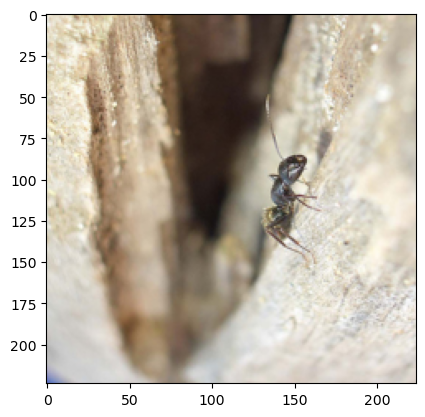

In [6]:
## train_dataset : 데이터를 불러오는 것 자체는 generator로 되어있어서 iter로 바꾼 다음 next를 해줘 data를 뽑아온다
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print("Dimension of image:", x.shape, "\n", 
      "Dimension of labels", y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

In [7]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # intialize parameters = 파라미터 초기화, w, b
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        # 직접 미분을 하기 때문에 파라미터로 설정은 안 해줌
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device),
                      "db": torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)

    def forward(self, x):
        ## compute forward
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))

    def backward(self, x, yhat, y):
        ## compute backward
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat - y)
    
    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr * self.grads["dw"]
        self.b = self.b - self.lr * self.grads["db"]

## utility functions
def loss(yhat, y):
    m = y.size()[1]
    return -(1/m)* torch.sum(y*torch.log(yhat) + (1 - y)* torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [13]:
## model pretesting
x, y = next(iter(train_dataset))
# 배치 사이즈 전체로 넣어줌
  # iter : 반복 가능한 객체에서 이터레이터를 반환
  # next : 이터레이터에서 값을 차례대로 꺼냄

## flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0) 

## num_px is the dimension of the images
dim = x_flatten.shape[0]

## model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

## calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost: ", cost)
print("Accuracy: ", prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

## 학습 전 결과

Cost:  tensor(0.6931)
Accuracy:  tensor(50.4098)


In [15]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0) 
    return x_flatten, y 

## training the model
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    # forward
    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)
        
    # backward
    lrmodel.backward(x.to(device), 
                    yhat.to(device), 
                    y.to(device))
    lrmodel.optimize()
    ## test
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)

    if i % 10 == 0:
        print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i, 
                                                                                    cost, 
                                                                                    train_pred,
                                                                                    test_pred))


Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969 | Test Acc: 45.75163269042969
Cost after iteration 10: 0.6691470742225647 | Train Acc: 64.3442611694336 | Test Acc: 54.24836730957031
Cost after iteration 20: 0.6513182520866394 | Train Acc: 68.44261932373047 | Test Acc: 54.24836730957031
Cost after iteration 30: 0.6367825865745544 | Train Acc: 68.03278350830078 | Test Acc: 54.24836730957031
Cost after iteration 40: 0.6245337128639221 | Train Acc: 69.67213439941406 | Test Acc: 54.90196228027344
Cost after iteration 50: 0.6139225959777832 | Train Acc: 70.90164184570312 | Test Acc: 56.20914840698242
Cost after iteration 60: 0.6045236587524414 | Train Acc: 72.54098510742188 | Test Acc: 56.86274337768555
Cost after iteration 70: 0.5960511565208435 | Train Acc: 74.18032836914062 | Test Acc: 57.51633834838867
Cost after iteration 80: 0.5883084535598755 | Train Acc: 73.77049255371094 | Test Acc: 57.51633834838867
Cost after iteration 90: 0.5811558365821838 | Train Acc: 

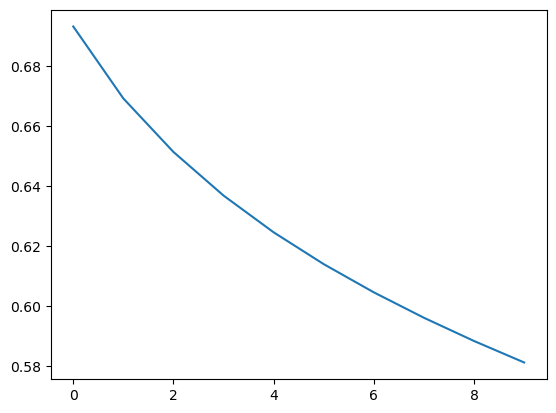

In [17]:
## the trend in the context of loss
plt.plot(costs)
plt.show()